# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data exploration, data preprocessing, and feature engineering if necessary. 
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

#### IMporting Libraries

In [59]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.tree
import sklearn.metrics
from sklearn import tree
import matplotlib.pyplot as plt

#### *Defining the Business Problem*

#### Data Collection

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/mnist.csv')
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
x = df.drop(['id','class'],axis=1)
y = df['class']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)

print("df size:",df.shape)
print("df train size:",x_train.shape)
print("df test size:",x_test.shape)

df size: (4000, 786)
df train size: (3000, 784)
df test size: (1000, 784)


#### Data Exploration

In [62]:
x_train.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

<Axes: xlabel='class'>

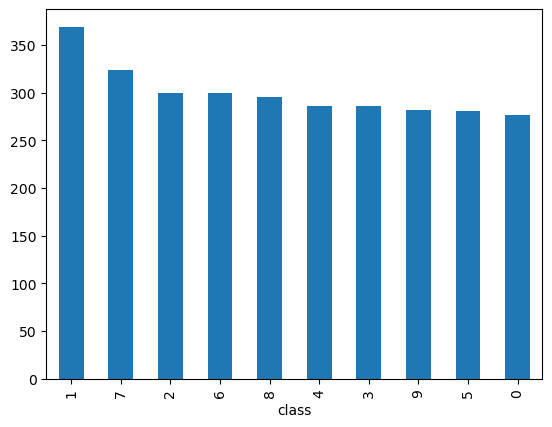

In [63]:
y_train.value_counts().plot(kind='bar')

In [64]:
x_train.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [65]:
x_train.sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

#### Data Pre-processing

In [66]:
## for example you can find and remove constant feature from your data

#### feature Eng

In [67]:
numerical_attributes = x_train.select_dtypes(include="int64").columns.tolist()

ct = sklearn.compose.ColumnTransformer([('standard_scaling', sklearn.preprocessing.StandardScaler(),numerical_attributes)],remainder='passthrough')
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

#### Model Training

In [68]:
model = sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

#### Model Assesment

In [69]:
y_predicted = model.predict(x_test)
result = sklearn.metrics.classification_report(y_test,y_predicted)
print(result)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        99
           1       0.89      0.92      0.91       117
           2       0.71      0.77      0.74        90
           3       0.70      0.62      0.66       131
           4       0.71      0.76      0.73        83
           5       0.57      0.63      0.60        82
           6       0.76      0.84      0.80        91
           7       0.83      0.80      0.82       102
           8       0.79      0.59      0.67       121
           9       0.69      0.75      0.72        84

    accuracy                           0.76      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.76      0.76      0.75      1000



#### Visualization

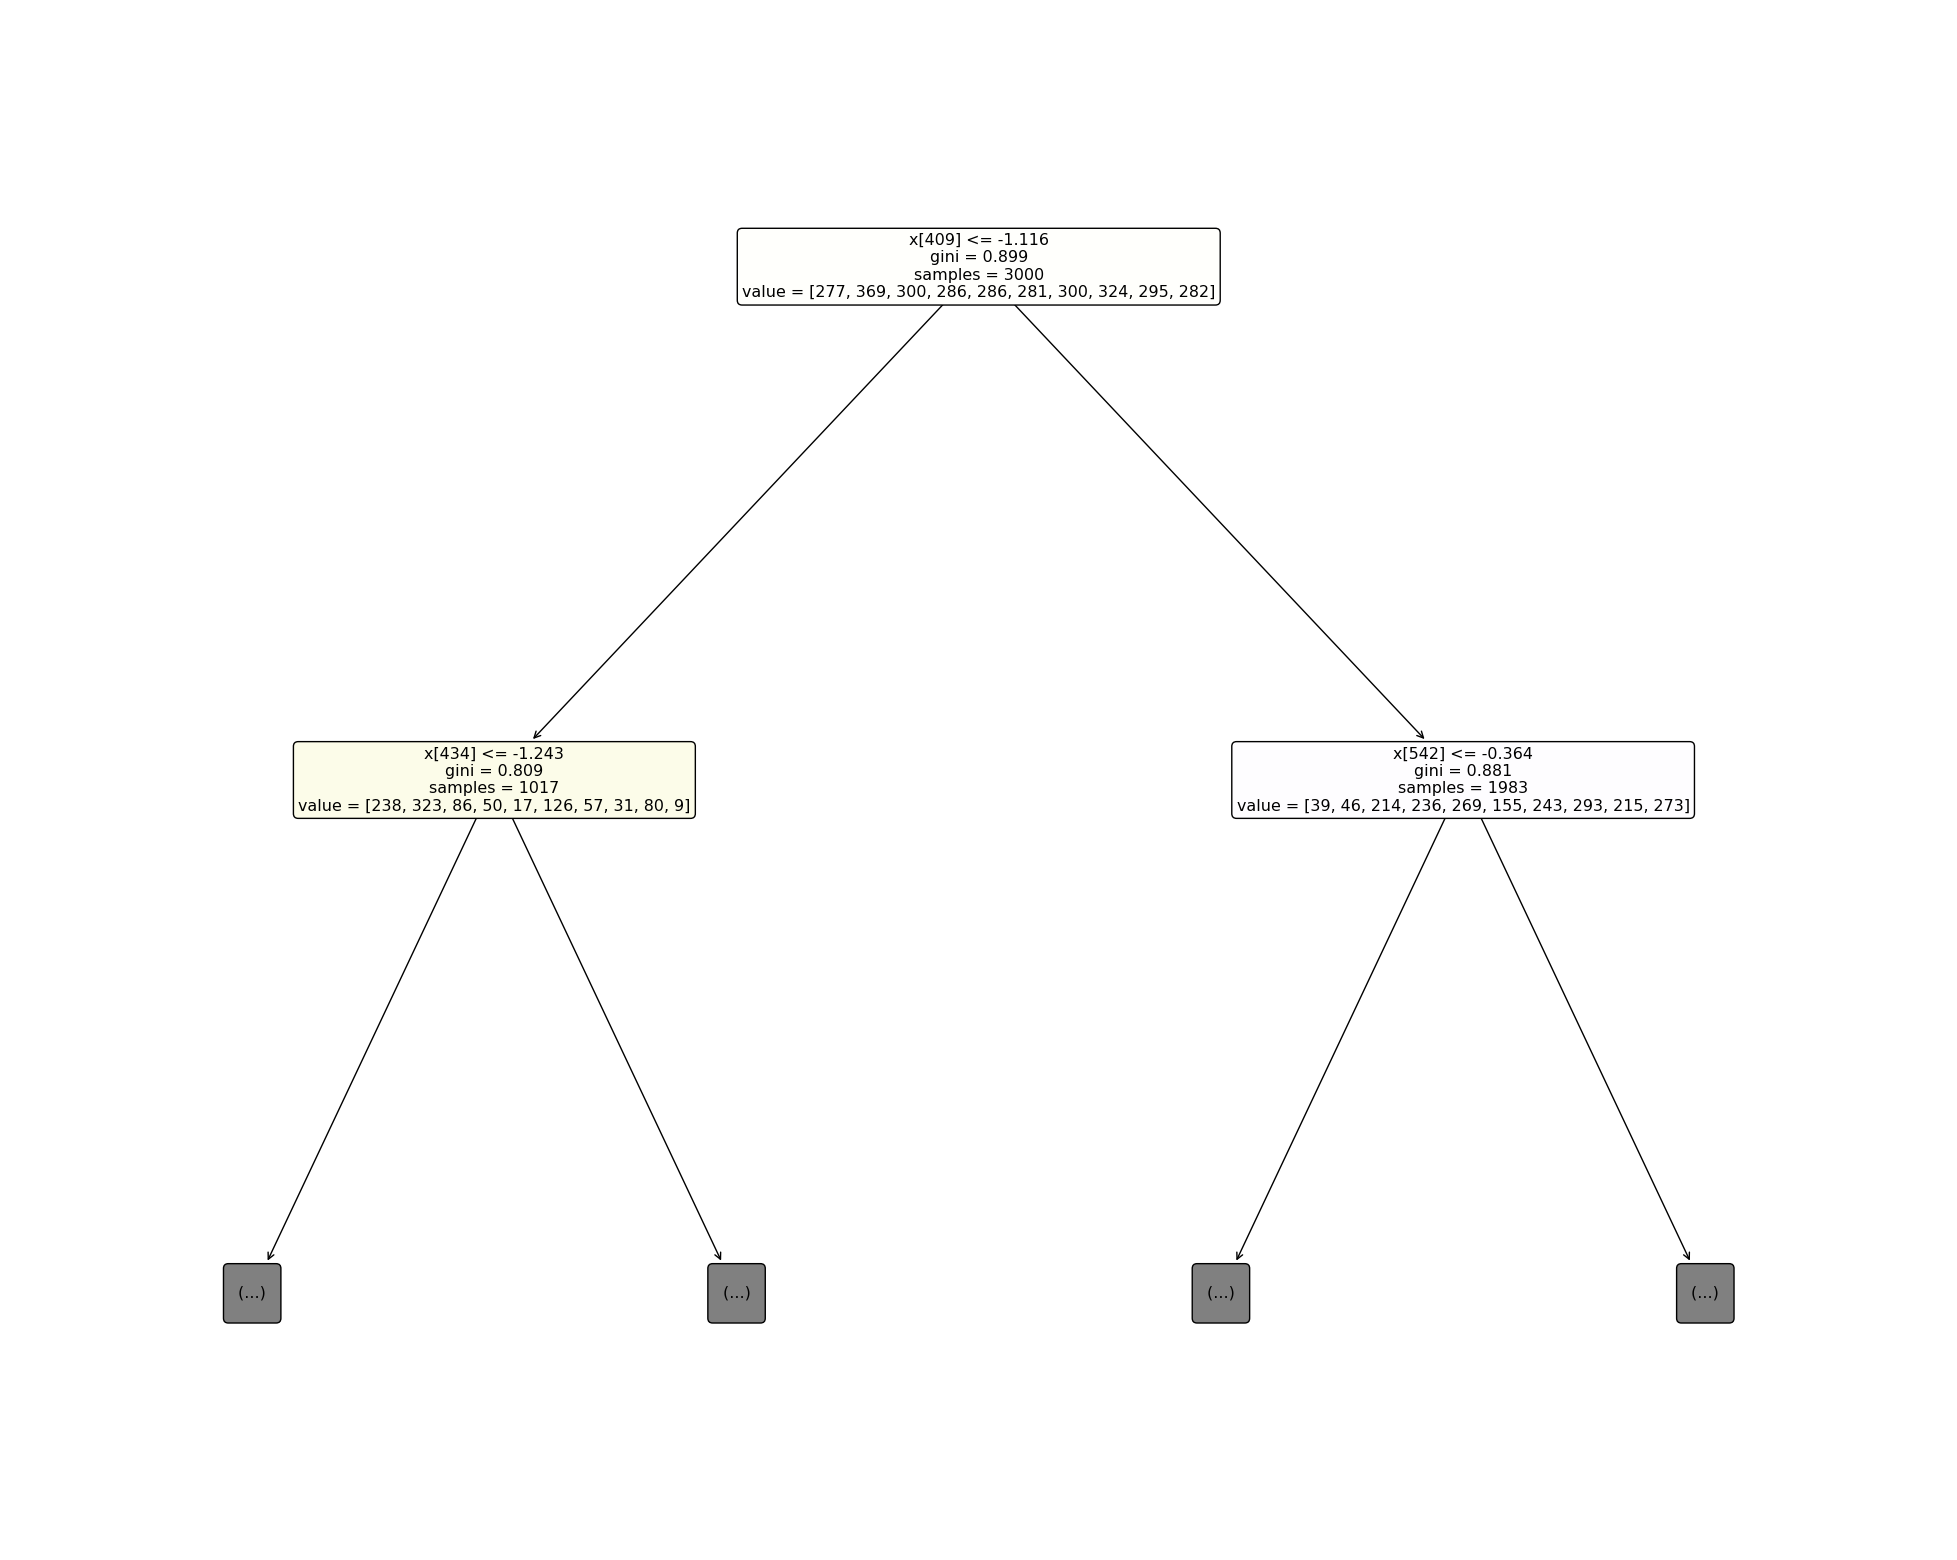

In [77]:
# Using matplotlib
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True, rounded=True,max_depth= 1)
plt.show()

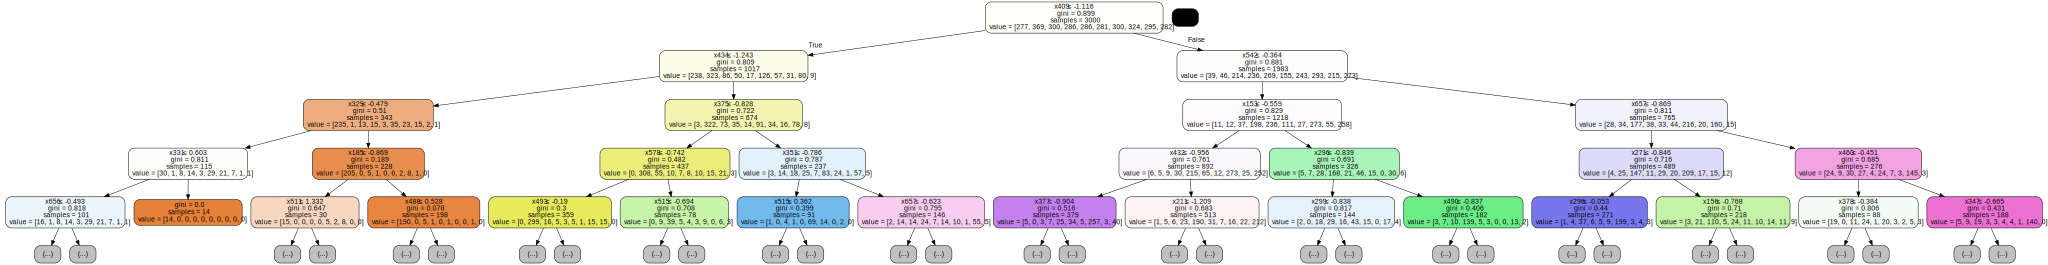

In [97]:
# Using graphviz
dot_data = export_graphviz(model, out_file=None, 
                    #  feature_names=df_train.feature_names,  
                    #  class_names=iris.target_names,  
                     filled=True, rounded=True,  max_depth=4,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())